# Вычислительная математика
## 5.1 Основы решений дифференциальных уравнений. Задача Коши

Содержание семинара:

- Дискретизация Задачи Коши. Частный случай, общий подход
- Дискретизация Задачи Коши. Общая теория дискретизации ОДУ.
    - Сходимость
    - Аппроксимация
    - Устойчивость
    - Теорема Рябенького-Лакса
    - Пример исследования задачи на аппроксимацию и сходимость
    - Пример с аппроксимацией начальных условий с произвольной точностью
- Канонический вид двухслойной схемы
- Исследование устойчивости. Спектральный признак Фон Неймана
- Исследование устойчивости. Алгоритм Далквиста
    - Примеры нахождение областей устойчивости
- Классификация разностных схем по областям устойчивости
    - Барьер Далквиста
- Одношаговые методы. Явные методы Рунге-Кутта. 
- Жесткие системы (доделать)
- Одношаговые методы. Неявные методы Рунге-Кутта
    - Пример с разницей явных и неявных РГ для жесткой системы
- Устойчивость методов Рунге-Кутта
    - Пример
- Многошаговые методы (сыро)
    - Многошаговые методы Адамса
    - Метод прогноза-коррекции Адамса
    - Метод Милна
- Анализ многошаговых методов на устойчивость (сложно написано)
    - Пример (плохо написано)

## Дискретизация Задачи Коши. Частный случай, общий подход

Рассмотрим общий подход к численному решению ОДУ.

Задача Коши ставится следующим образом: 

$$
\left\{\begin{array}{l}
\dfrac{d u}{d t}=f(t, u), \quad t \in [0, T] \\
u(0)=u_{0}
\end{array}\right.
$$  

Далее будем полагать, что решение существует и единственно.

В общем случае аналитически не решается - а решать-то хочется.

Понятное дело, на компьютере не можем работать с континуумом значений. Необходимо произвести __дискретизацию__ задачи.

Зададим сетку с равным шагом:

$$
0=t_0<t_1<t_2<\cdots<t_{n-1}<t_N=T
$$

$$
\tau=t_{n+1}-t_n
$$

Также зададим дискретную функцию $y_n$ на этой сетке, от которой хотим 

$$
y_n \approx u\left(t_n\right), \quad n=0,1, \cdots, N
$$

Таким образом, $y_n$ - это значения решения __дискретизованного ОДУ__ на заданной сетке.

__Важно.__ Заметьте, $u(t)$ - истинное (математическое) решение ОДУ, а $y_n$ - это сеточно-заданная функция. Таки разные вещи.


Вспомним про численную аппроксимацию производной. Выберем какую-нибудь численную схему, например, самую простую. Тогда

$$
\left.\frac{d u}{d t}\right|_{t_n} =\lim _{\tau \rightarrow 0} \frac{u(t_n+\tau)-u(t_n)}{\tau} \approx \frac{y_{n+1}-y_n}{\tau}
$$

Подставляя это в изначальное уравнение, мы получаем __дискретизованную Задачу Коши__ или __разностная задача__:

$$
\left\{\begin{array}{l}
\cfrac{y_{n+1}-y_n}{\tau}=f(t_n, y_n), \quad t \in [0, T] \\
y_0=u_{0}
\end{array}\right.
$$  

__Примечание.__ Конкретно такой вид дискретизации называется __явная схема Эйлера__. Естественно, дискретизовывать можно по разному, выбирая различные разностные схемы и правые части, которые __формально__ стремятся к истинной задаче Коши при $\tau \rightarrow 0$.

Явную схему Эйлера уже понятно, как решать. Это же просто реккурента:

$$
y_{n+1}=y_n+\tau \cdot f\left(t_n, y_n\right), \quad n \geqslant 1
$$

Далее постараемся обобщить этот подход.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import ipywidgets as widgets
from matplotlib.pyplot import figure


# Define the ODE to be solved
t = sympy.symbols('t')
y = sympy.Function('y')(t)
f = -y + sympy.sin(t)

# Set initial conditions and parameters
y0 = 1.0 # initial value of y
t0 = 0.0 # initial time
T = 10.0 # final time

# Calculate the exact solution using sympy and convert to numpy function
y_exact = sympy.dsolve(sympy.Eq(y.diff(t), f), y, ics={y.subs(t, t0): y0})
y_exact_func = sympy.lambdify(t, y_exact.rhs, 'numpy')
t_arr_dense = np.linspace(t0, T, 1000) # denser time array for exact solution
y_exact_arr = y_exact_func(t_arr_dense)



# Define the interactive slider for h
h_widget = widgets.FloatSlider(min=0.01, max=1.0, step=0.01, value=0.01, description='h')

# Define the function to be called when the value of h changes
def update_plot(h):
    # Initialize arrays to store the results
    t_arr = np.arange(t0, T+h, h) # time array
    y_arr = np.zeros_like(t_arr) # solution array
    y_arr[0] = y0 # set the initial value of y

    # Solve the ODE using Explicit Euler scheme
    for i in range(0, t_arr.size-1):
        y_arr[i+1] = y_arr[i] + h*f.subs([(y, y_arr[i]), (t, t_arr[i])]).evalf()

    figure(figsize=(14, 6), dpi=300)
    
    # Plot the results
    plt.plot(t_arr[:-1], y_arr[:-1], 'o', label='$y^{(τ)}=\{y_n\}_{n=0}^N$ - решение дисретизованного ОДУ')
    plt.plot(t_arr_dense, y_exact_arr, '-', label='y(x) - истинное решение')
    plt.plot(t_arr[:-1], y_exact_func(t_arr[:-1]), 'o', label='$[y(x)]^{(τ)}=\{y(x_n)\}_{n=0}^N$ - проекция истинного решения на сетку', c = 'red')

    
    # Plot vertical line between last approximate solution point and last exact solution projection point
    plt.vlines(t_arr[:-1], ymin=y_arr[:-1], ymax=y_exact_func(t_arr[:-1]), colors='gray', linestyles='dashed', alpha=0.75)
    
    plt.xlabel('t')
    plt.ylabel('y')
    
    plt.ylim((-0.9, 1.1))
    
    plt.legend(loc=3, fontsize=14)
    plt.show()

# Call the update_plot function with the initial value of h
#update_plot(h_widget.value)

# Display the interactive slider
widgets.interact(update_plot, h=h_widget)


interactive(children=(FloatSlider(value=0.01, description='h', max=1.0, min=0.01, step=0.01), Output()), _dom_…

<function __main__.update_plot(h)>

__Примечание.__ Выполните ячейку сверху и поиграйтесь с параметром шага дискретизованного ОДУ. Видим, что при больших значениях шага, решение дискретизованного ОДУ (синие точки) не совпадает с истинным (математическим) решением. Обратите так же внимание на обозначения в легенде.

### Примеры различных простых дискретизаций

Пусть задача Коши $\dfrac{d y}{d x}=f(t, y)$

Тогда, несколько вариантов соответствющих ей разностных задач $\hat{L}_{\tau} y^{(\tau)}=F^{(\tau)}$:

- __Явная схема Эйлера__

$$
\frac{y_{n+1}-y_n}{\tau}=f\left(t_n, \, y_n\right)
$$

- __Неявная схема Эйлера__

$$
\frac{y_{n+1}-y_n}{\tau}=f\left(t_{n+1}, \, y_{n+1}\right)
$$

Неявная она потому, что в общем случае на каждом шаге приходится решать нелинейное уравнение на $y_{n+1}$.

- __Симметризованная схема__

$$
\frac{y_{n+1}-y_n}{\tau}=\frac{1}{2} \cdot \left(f\left(t_n, \, y_n\right)+f\left(t_{n+1}, \, y_{n+1}\right)\right)
$$

- __Схема с центральной разностью__

$$
\frac{y_{n+1}-y_{n-1}}{2 \cdot \tau}=f\left(t_{n}, y_{n}\right)
$$

Видно, что строить их достаточно просто - главное обеспечить "аля" сходимость $\hat{L}_{\tau} \rightarrow \hat{L}$ и $F^{(\tau)} \rightarrow F(x)$.

__Примечание.__ Первые три схемы относятся к __двуслойным__ схемам, а четвёртая к __трёхслойным__. Подумайте почему.

__Примечание.__ Начальные условия в виде производной в какой-то точке также необходимо дискретизовывать, и это влияет на точность. Смотреть пример ниже.

Для определения того, какая схема лучше и корректна ли схема вообще, необходимо ввести какие-то числовые параметры.

## Дискретизация Задачи Коши. Общая теория дискретизации ОДУ.

Пусть заданы дифференциальная задача Коши (ОДУ):

$$
\hat{L} \; y(x)=F(x)
$$

Здесь $\hat{L}$ - дифферециальный оператор. К примеру, $\hat{L} = \frac{d}{dx}$ или $\hat{L} = x \cdot \frac{d^2}{dx^2} -1 $. 

Поставим ей в соответствие __разностную задачу__:

$$
\hat{L}_{h} y^{(h)}=F^{(h)}
$$

где $y^{(h)}, F^{(h)}$ - __сеточные функции__, значения которых заданы в конечном наборе равноотстоящих (с шагом $h$ ) точек $\left\{x_{k}\right\}_{k=0}^{N}$. Заметим, что $y^{(h)}$ мы заранее не знаем и определяем его из решения даной разностной задачи. Также отметим, что сеточная функция $F^{(h)}$ не обязана быть $F(x)$, спроецированной на сетку, - это необходимо только в пределе $h \rightarrow 0$. 

Соответственно, $\hat{L}_{h}$ - оператор, действующий на множестве сеточных функций. Выбирается нами так, чтобы приблизить $\hat{L}$. Для предыдущих примеров, соответственно, $\hat{L}_h = \cfrac{y_{n+1}-y_n}{h}$ или $\hat{L}_h = x_n \cdot \cfrac{y_{n+1} - 2 y_{n} + y_{n-1}}{h^2} - 1 $

Введём __проекцию истинного решения на сетку__ как 

$$\left[y(x)\right]^{(h)}=\left\{y\left(x_{k}\right)\right\}_{k=0}^{N}$$

$\left[y(x)\right]^{(h)}$ - тоже __сеточная функция__, полученная на основе значений истинного решения $y(x)$ взятых точках области определения $y^{(h)}$.

__Примечание.__ Всё вышеперечисленное остаётся верным при трактовке $y$ и $f$ как векторов, т.е. рассмотрении систем дифференциальных уравнений.

### __Сходимость__

Введём __невязку__ как сеточную функцию

$$\delta^{(h)}=y^{(h)}-[y(x)]^{(h)}$$

Тогда будем говорить, что метод "сходится" при

$$\quad\left\|\delta^{(h)}\right\|_{h \rightarrow 0} \rightarrow 0$$

При этом, если 

$$\left\|\delta^{(h)}\right\|=O\left(h^p\right)$$

то __сходимость имеет порядок $p$__.

На практие её достаточно тяжело определить, т.к. нужно много знать про истинное решение $y(x)$ - нужны некоторые хитрости. Одну из таких хитростей мы рассматривали на семинаре по численному интегрированию - оценка погрешности по Рунге. 

### __Как оценивать порядок сходимости на практике__

Введём $\hat{y}^{(h)}$ - сеточная функция, полученная на основе значений $y^{(h)}$ взятых в каждой второй точке начиная с первой (размерности $\hat{y}^{(h)}$ и $y^{(2 h)}$ совпадают, и там в два раза меньше точек, чем в $y^{(h)}$ - __но вычисляются они по-разному!__).

Тогда __порядок сходимости__ можно явно оценить из следующего равенства:

$$
\left\|\delta^{(h)}\right\|=\left\|y^{(h)}-[y(x)]^{(h)}\right\| \approx const \cdot \left\|\hat{y}^{(h)}-y^{(2 h)}\right\|
$$

Последнюю величину вполне себе можно считать в ходе расчёта и смотреть её ассимптотику от $h$.

__Доказательство:__

Введём $e^{(h)}$ и $e^{(2 h)}$ - постоянные во всех точках сеточные функции, с единичной нормой. Пусть $p$ - порядок сходимости. Тогда

$$
y^{(h)}=[y(x)]^{(h)}+C h^{p} e^{(h)}
$$

$$
y^{(2 h)}=[y(x)]^{(2 h)}+C(2 h)^{p} e^{(2 h)}
$$

$$
\hat{y}^{(h)}=[y(x)]^{(2 h)}+C h^{p} e^{(2 h)}
$$

Вычтем второе из третьего:

$$
C h^{p}\left\|e^{(2 h)}\right\| \approx \frac{\left\|\hat{y}^{(h)}-y^{(2 h)}\right\|}{2^{p}-1}
$$

Заметим, что  $y^{(h)}-[y(x)]^{(h)} = C h^{p} e^{(h)}$.

А тогда, т.к. $\left\|e^{(2 h)}\right\|=\left\|e^{(h)}\right\|=1$ получаем:

$$
\left\|\delta^{(h)}\right\|=\left\|y^{(h)}-[y(x)]^{(h)}\right\| \approx \frac{\left\|\hat{y}^{(h)}-y^{(2 h)}\right\|}{2^{p}-1} 
$$

### __Аппроксимация__

Подействуем __разностным оператором__ на проекцию истинного (__!__) решения $\hat{L}_{h}[y(x)]^{(h)}$. 

Посмотрим, решает ли эта проекция разностную задачу (если решает, то найденное в лоб решение разностной задачи является проекцией истинного решения в силу теоремы единственности).

Введём сеточную функцию 

$$\psi^{(h)}=\hat{L}_{h}[y(x)]^{(h)}-F^{(h)}$$ 

Если $\psi^{(h)}$ не ноль, то $[y(x)]^{(h)}$ - не является решением разностной задачи $\hat{L}_{h} y^{(h)}=F^{(h)}$. А она при любых $h$ будет ненулевой :). 

Поэтому говорят, что данная разностная задача __аппроксимирует__ исходную задачу Коши, если

$$\left\|\psi^{(h)}\right\|_{h \rightarrow 0} \rightarrow 0$$ 

При этом, если $\left\|\psi^{(h)}\right\|=O\left(h^p\right)$, то __аппроксимация имеет порядок $p$__.

__Примечание.__ Аппроксимация не эквивалентна сходимости! Нужен ещё один параметр.

__Примечание.__ Для определения порядка аппроксимации как правило не нужно знать истинное решение. Пример ниже.

### __Устойчивость__ 

Введём возмущение на свободный член $\delta F^{(h)}$, и найдём решение возмущённой разностной задачи

$$\quad \hat{L}_{h} z^{(h)}=F^{(h)}+\delta F^{(h)}$$

__Определение 1.__ Считаем, что задача __устойчива__ к возмущению, при

$$\left\|z^{(h)}-y^{(h)}\right\|<C\left\|\delta F^{(h)}\right\|$$

__Примечание.__ Норму можно брать любую на конечномерном векторном пространстве.

Такое определение устойчивости не очень удобно на практике, поэтому вводят более узкое определение.

__Определение 2.__ Разностная схема $\hat{L}_{h} y^{(h)}=F^{(h)}$ называется __корректной__, если 

$$
\exists С>0: \forall h > 0 \; \hookrightarrow \; \left\|y^{(h)}\right\| \leqslant С\cdot \left\|F^{(h)} \right\|
$$

Заметим, что __из корректности следует устойчивость__.

## Теорема Рябенького-Лакса

__Теорема.__ Решение разностной задачи __сходится__ к решению задачи Коши __тогда и только тогда__, когда разностная задача __устойчива__ и __аппроксимирует__ задачу Коши. При этом порядок аппроксимации равен порядку сходимости.

## Пример 1 исследования задачи

Для решения задачи Коши

$$
y^{\prime \prime}+6 y^{\prime}+5 y=0, \quad y(0)=0, \quad y^{\prime}(0)=2, \quad x \in[0,1]
$$

предложена разностная схема (заметим, что начальные условия также также дискретизовали! Пояснение ниже.)

$$
\left\{\begin{array}{l}
\cfrac{y_{l+1}-2 y_{l}+y_{l-1}}{h^{2}}+6 \cfrac{y_{l+1}-y_{l-1}}{2 h}+5 y_{l}=0, \quad l=2, \ldots, L-1 \\
y_{0}=0, \quad y_{1}=2 h-6 h^{2}
\end{array}\right.
$$

Опеределить порядок аппроксимации  и сравнить с порядком сходимости.

__Примечание.__ Как дискретизовывать начальные (граничные) условия? В данном случае мы выбрали такую численную задачу, в которой для определения следующей точки $y_{l+1}$ нам нужно две предыдущих: $y_{l}, \; y_{l-1}$. Следовательно, чтобы "запустить" алгоритм, нам нужно уже иметь две точки: $y_0$ и $y_1$.

В "идеале" наше численное решение $y^{(h)}$ должно быть равно проекции истинного решения $[y(x)]^{(h)}$. Давайте эти самые первые точки постулируем равными первым точкам сеточной функции $[y(x)]^{(h)}$:

$$
y_0 \stackrel{\text{def}}{=} y(0) = 0
$$

$$
y_1 \stackrel{\text{def}}{=} y(h) =  y(0) + y'(0) \cdot h + \frac{1}{2}y''(0)\cdot h^2 + O( h^3) = 2h - 6h^2 + O( h^3)
$$

__Решение:__

__Аппроксимация__ (напоминаю про обозначение $[y]^{(h)} = [y(x)]^{(h)}$):

$$
\psi^{(h)}=\hat{L}_{h}[y(x)]^{(h)}-F^{(h)}=\left\{\begin{array}{l}
{[y]_{0}-0} \\
{[y]_{1}-2 h+6 h^{2}} \\
\cfrac{[y]_{l+1}-2[y]_{l}+[y]_{l-1}}{h^{2}}+6 \cfrac{[y]_{l+1}-[y]_{l-1}}{2 h}+5[y]_{l}, \quad l=2, \ldots, L-1
\end{array}\right. 
$$

Обратите внимание на первую и вторую точки. В ней чисто технически у нас другая численная схема, поэтому равенство именно такое.

Хотим понять ассимптотику этой сеточной функции при $h \rightarrow 0$. Для этого воспользуемся свойствами проецирования и рядом Тейлора:

$$
\begin{aligned}
{[y(x)]_{l+1}=[y(x+h)]_{l} } &=\left[y(x)+ h y^{\prime}(x)+\frac{(h)^{2}}{2} y^{\prime \prime}(x)+\cdots+\frac{(h)^{n}}{n !} y^{n}(x)+O\left(h^{n+1}\right)\right]_{l}=\\
&=[y]_{l}+h\left[y^{\prime}\right]_{l}+\frac{(h)^{2}}{2}\left[y^{\prime \prime}\right]_{l}+\cdots+\frac{(h)^{n}}{n !}\left[y^{n}\right]_{l}+O\left(h^{n+1}\right)
\end{aligned}
$$  

$$
\begin{aligned}
{[y(x)]_{l-1}=[y(x-h)]_{l} } &=\left[y(x)- h y^{\prime}(x)+\frac{(h)^{2}}{2} y^{\prime \prime}(x)+\cdots+\frac{(-h)^{n}}{n !} y^{n}(x)+O\left(h^{n+1}\right)\right]_{l}=\\
&=[y]_{l}-h\left[y^{\prime}\right]_{l}+\frac{(h)^{2}}{2}\left[y^{\prime \prime}\right]_{l}+\cdots+\frac{(-h)^{n}}{n !}\left[y^{n}\right]_{l}+O\left(h^{n+1}\right)
\end{aligned}
$$  

Подставляем всё в аппроксимацию:.

$$ \\
\psi^{(h)}=\left\{\begin{array}{l}
0 \\
\\
{[y]_{0}+h\left[y^{\prime}\right]_{0}+\frac{h^{2}}{2}\left[y^{\prime \prime}\right]_{0}-2 h+6 h^{2}} +O\left(h^{3}\right) \\
\\
\cfrac{[y]_{l}+h\left[y^{\prime}\right]_{l}+\frac{h^{2}}{2}\left[y^{\prime \prime}\right]_{l}+\frac{h^{3}}{6}\left[y^{\prime \prime \prime}\right]_{l}-2[y]_{l}+[y]_{l}-h\left[y^{\prime}\right]_{l}+\frac{h^{2}}{2}\left[y^{\prime \prime}\right]_{l}-\frac{h^{3}}{6}\left[y^{\prime \prime \prime}\right]_{l}+O\left(h^{4}\right)}{h^{2}} \;+ \\
\quad \quad \quad + \;6 \; \cfrac{[y]_{l}+h\left[y^{\prime}\right]_{l}+\frac{h^{2}}{2}\left[y^{\prime \prime}\right]_{l}+\frac{h^{3}}{6}\left[y^{\prime \prime \prime}\right]_{l}-[y]_{l}+h\left[y^{\prime}\right]_{l}-\frac{h^{2}}{2}\left[y^{\prime \prime}\right]_{l}+\frac{h^{3}}{6}\left[y^{\prime \prime \prime}\right]_{l}+O\left(h^{4}\right)}{2 h}+5[y]_{l}, \quad l=2, \ldots, L-1
\end{array}\right.
$$

Упростим первые два слагаемых. Из начальных условий: $[y]_{0}=0,\left[y^{\prime}\right]_{0}=2 ;$ из уравнения: $\left[y^{\prime \prime}\right]_{0}=-6\left[y^{\prime}\right]_{0}-5[y]_{0}=-12$. 

В остальных слагаемых подставим выраженный из уравнения $y'''=-6y''-5y'$.

$$
\begin{aligned}
\psi^{(h)} &=\left\{\begin{array}{l}
0 \\
2 h-6 h^{2}+O\left(h^{3}\right)-2 h+6 h^{2} \\
\cfrac{h^{2}\left[y^{\prime \prime}\right]_{l}+O\left(h^{4}\right)}{h^{2}}+6 \cfrac{2 h\left[y^{\prime}\right]_{l}+\cfrac{h^{3}}{3}\left[y^{\prime \prime \prime}\right]_{l}}{2 h}+5[y]_{l}, \quad l=2, \ldots, L-1
\end{array}=\right.\\
&=\left\{\begin{array} { l } 
{ 0 } \\
{ O ( h ^ { 3 } ) } \\
{ [ y ^ { \prime \prime } ] _ { l } + 6 [ y ^ { \prime } ] _ { l } + 5 [ y ] _ { l } + O ( h ^ { 2 } ) , \quad l = 2 , \ldots , L - 1 }
\end{array}  \quad = \quad \left\{\begin{array}{l}
0 \\
O\left(h^{3}\right) \\
O\left(h^{2}\right), \quad l=2, \ldots, L-1
\end{array}\right.\right.
\end{aligned}
$$

Таким образом, $\left\|\psi^{(h)}\right\|=\max _{l}\left|\psi_{l}^{(h)}\right| = O\left(h^{2}\right)$. Т.е. порядок аппроксимации равен двум. Заметим, что для анализа на аппроксимацию нам не понадобилось аналитически решать ДУ.

Более того, порядок аппроксимации можно было определить сходу - численные производные имели 2-й порядок аппроксимации, а начальные условия вообще 3-й.

__Сходимость__:

Аналитическое решение задачи Коши:

$$
y(x) = \cfrac{1}{2}  \cdot \left( e^{-x} - e^{-5x} \right)
$$

Решение разностной схемы также можно явно получить, т.к. тут простая реккурента:

$$
\left\{\begin{array}{l}
y_{l+1} = \cfrac{2 - 5h^2}{1 + 3h} y_l+\cfrac{3 h - 1}{1 + 3h} y_{l-1}, \quad l=2, \ldots, L-1 \\
y_{0}=0, \quad y_{1}=2 h-6 h^{2}
\end{array}\right.
$$

Используя sympy, можно легко получить общее решение этой реккуренты и, соответственно, вычислить ассимптотику невязки:

$$
\left\|\delta^{(h)}\right\| =\left\|y^{(h)}-[y]^{(h)}\right\|=\max _{l}\left|y_{l}^{(h)}-[y]_{l}^{(h)}\right|
$$  

In [2]:
from IPython.display import display, Math
from sympy import symbols, Function, rsolve, limit, Rational, exp

h = symbols('h')
l = symbols('l', integer=True)
y = Function('y')

recurrence = y(l+1) - ((2-5*h**2)/(1+3*h))*y(l) - ((3*h-1)/(1+3*h))*y(l-1) # Определяем реккуренту

solution = rsolve(recurrence, y(l), {y(0):0, y(1):2*h-6*h**2}) # Решаем реккуренту

display(Math("$y_l=$"))
display(solution)

delta = solution - Rational(1, 2)*(exp(-h*l) - exp(-5*h*l)) # Явным образом определяем невязку

display(Math("$\\delta_l = $"))
display(delta)

display(Math("$\\delta_l\\approx$"))

taylor_series = delta.series(h, 0) # Смотрим ассимптотику

display(taylor_series)

<IPython.core.display.Math object>

((-5*h**2 - h*sqrt(25*h**2 + 16) + 2)/(2*(3*h + 1)))**l*(18*h**2/sqrt(25*h**2 + 16) - 2/sqrt(25*h**2 + 16)) + ((-5*h**2 + h*sqrt(25*h**2 + 16) + 2)/(2*(3*h + 1)))**l*(-18*h**2/sqrt(25*h**2 + 16) + 2/sqrt(25*h**2 + 16))

<IPython.core.display.Math object>

((-5*h**2 - h*sqrt(25*h**2 + 16) + 2)/(2*(3*h + 1)))**l*(18*h**2/sqrt(25*h**2 + 16) - 2/sqrt(25*h**2 + 16)) + ((-5*h**2 + h*sqrt(25*h**2 + 16) + 2)/(2*(3*h + 1)))**l*(-18*h**2/sqrt(25*h**2 + 16) + 2/sqrt(25*h**2 + 16)) - exp(-h*l)/2 + exp(-5*h*l)/2

<IPython.core.display.Math object>

h**2*(6*l**2 - 6*l*(l - 1) - 6*l) + h**3*(-31*l**3/3 + 31*l*(l - 2)*(l - 1)/3 + 31*l*(l - 1)) + h**4*(13*l**4 - 13*l*(l - 3)*(l - 2)*(l - 1) - 78*l*(l - 2)*(l - 1) - 78*l*(l - 1)) + h**5*(-781*l**5/60 + 781*l*(l - 4)*(l - 3)*(l - 2)*(l - 1)/60 + 781*l*(l - 3)*(l - 2)*(l - 1)/6 + 1015*l*(l - 2)*(l - 1)/3 + 234*l*(l - 1)) + O(h**6)

Видим первый ненулевой член невязки оказался ~ $h^2$. 

То есть, порядок сходимости оказался равен двум - такой же как и порядок аппроксимации, как и должно быть по теореме Рябенького-Лакса.

Отметим, что аналитически найти порядок сходимости можно примерно никогда, т.к. 

1. Аналитическое решение может быть неизвестно
2. Практически никогда нельзя аналитически решить разностную задачу - для этого нам компьютор и нужон

Таким образом, если определить порядок аппроксимации можно всегда, то для определения сходимости нам нужно дополнительно научиться определять, устойчив ли метод.

## Пример 2 - Аппроксимация начальных условий с произвольной точностью

Решим ещё одну задачку.

Пусть имеем сложную задачу Коши:
    
$$
\left\{\begin{array}{l}
y^{\prime \prime}+\cfrac{1+x}{1+x^2} y^{\prime}+\cos (x) y=\cfrac{1}{1+x^2}, \quad   x \geq 1 \\
y(1)=3, \quad y'(1)=-1
\end{array}\right.
$$

Необходимо аппроксимировать начальные условия с произвольной заданной точностью.

Зачем? Нам может понадобится более чем две точки для старта алгоритма. Научимся сразу же приближать их с нужной точностью (порядком аппроксимации).

Сначала поймём, что любая производная в начальной точке $y^{(k)}(1)$ нам известна - её легко можно выразить из уравнения, беря от него производные и подставляя предыдущие найденные значения. С помощью sympy вычислим первые 5 производных. 

In [12]:
from IPython.display import display, Math, Latex
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')(x)

k = 5

# Define the differential equation
DE = y.diff(x, 2) + (1+x)/(1+x**2)*y.diff(x) + sp.cos(x)*y - 1/(1+x**2)

# Define the initial conditions
init_conds = {y.subs(x, 1): 3, y.diff(x).subs(x, 1): -1}

# Solve for the derivatives at x=1
for i in range(2, k):
    
    DE_derivatived = DE.diff(x, i - 2).subs(x, 1)
    
    deriv = y.diff(x, i).subs(x, 1)
    
    sol = sp.solve(
                    DE_derivatived.subs(init_conds),
                    deriv,
                    list = True
                  )[0].simplify()

    init_conds[deriv] = sol

# Print the results
print("Истинные начальные условия:")
for i in range(0, k):
    deriv = y.diff(x, i)
    _ = "$ y^{("+ str(i)  + ")} (1)$ = $" + sp.pretty(sp.latex(init_conds[deriv.subs(x, 1)])) + "$"
    display(Latex(_))

Истинные начальные условия:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Далее определим произвольное количество первых точек искомого решения $y^{(h)}$ через Тейлора. Напомним, что для начальных условий в данном случае:

$$
y_n \stackrel{\text{def}}{=} y(1 + n \cdot h)
$$

In [14]:
x = sp.symbols('x')
h = sp.symbols('h')

y = Function('y')

N = 6

print("Дискретизованные начальные условия с произвольной точностью:")
for i in range(len(init_conds.keys())):
    y_curr = (y(1 + i*h).series(h, 0, 5).xreplace(init_conds)) # xreplace for reccurent expressions
    
    _ = "$ y_{"+ str(i)  + "}$ = $" + sp.pretty(sp.latex(y_curr), wrap_line = False) + "$"
    display(Latex(_))
    

Дискретизованные начальные условия с произвольной точностью:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Канонический вид двухслойной схемы

Пусть имеем произвольную задачу Коши с любой старшей производной. Из курса диффуров знаем, что её всегда можно переписать  в виде системы:

$$
\frac{d \mathbf{u}}{d t}=\mathbf{f}(t, \mathbf{u}), \quad t>0, \quad \mathbf{u}(0)=\mathbf{u_0} , \quad \mathbf{u}: \mathbb{R} \rightarrow	\mathbb{R}^N , \quad \mathbf{f} : \mathbb{R}^{N+1} \rightarrow	\mathbb{R}^N
$$

которую формально можно записать в операторном виде:

$$
\hat{L} \; \mathbf{u}(t)=\mathbf{f}(t, \mathbf{u})
$$

и поставить ей в соответствие разностную схему (__дискретизация__):

$$
\hat{L}_{h} \mathbf{y}^{(h)}=\mathbf{F}^{(h)}
$$

Пусть эта схема двухслойная (т.е. $\mathbf{y}_{n+1}$ может зависеть только от $\mathbf{y}_{n}$).

__Определение.__ __Каноническая форма__ двухслойной схемы - это схема в виде:

$$
\mathbf{y}_{n+1}=\hat{R}_h \cdot \mathbf{y}_n+h \cdot \mathbf{\rho}_n
$$

где явно выделен так называемый __оператор послойного перехода__ $\hat{R}_h$. Естественно, этот оператор должен быть линеен, и действует только на $\mathbf{y}_n$.

Каноническую форму можно всегда вывести из обычного вида численной схемы.

Для решения разностной задачи каноническая форма, в общем-то, бесполезна, т.к. в общем случае для её нахождения необходимо линеаризировать истинное решение диффура. Тем не менее, оператор оператор перехода $\hat{R}_h$ не будет зависеть в явном виде от истинного решения, что даёт нам возможность анализировать через него систему на устойчивость.

__Пример.__ Найдём канонический вид неявной схемы Эйлера.

Пусть имеем ОДУ:

$$u^{\prime}=f(t, u), \quad u(0)=u_0$$

Неявная схема Эйлера имеет вид:

$$
\frac{y_{n+1}-y_n}{\tau}=f\left(t_{n+1}, y_{n+1}\right), \quad y_0=u_0 .
$$

Перепишем разностную схему в виде

$$
y_{n+1}=y_n+\tau f\left(t_{n+1}, y_{n+1}\right) 
$$

Хотим избавиться от $y_{n+1}$ в нелинейной в общем случае $f$. Пусть $\varphi(t)=y(t)$ - истинное (математическое) решение. Для малых $\tau$ отклонение от истинной траектории будет невилико. Таким образом, раскладывая вблизи истинной траектории:

$$
f\left(t_{n+1}, y_{n+1}\right) \approx f\left(t_{n+1}, \; \varphi \left(t_{n} \right)\right)+\frac{\partial f}{\partial u}\left(y_{n+1}-\varphi(t_{n})\right)
$$

А тогда канонический вид:

$$
y_{n+1}=\hat{R}_\tau y_n+\tau \rho_n
$$

$$
\hat{R}_\tau=\left(1-\tau \left.\frac{\partial f}{\partial u}\right|_{(y_n, \, t_n)}\right)^{-1}, \quad \rho_n=f\left(t_{n+1}, \varphi(t_{n})\right)-\left.\frac{\partial f}{\partial u}\right|_{(y_n,\, t_n)} \varphi(t_{n})
$$

Как и было обещано, $\hat{R}_\tau$ не зависит от истинного решения $\varphi(t)$, но зависит от локального положения траектории.

Также отметим, что в общем случае (системы ОДУ), $\frac{\partial f}{\partial u}$ - матрица Якоби и $\hat{R}_\tau$ является именно матрицей.

## Исследование устойчивости. Спектральный признак Фон Неймана

__Теорема (достаточное условие устойчивости, спектральный признак Фон Неймана).__ Пусть имеем записанную в каноническом виде систему $\mathbf{y}_{n+1}=\hat{R}_h \cdot \mathbf{y}_n+h \cdot \mathbf{\rho}_n$. Тогда для её корректности (а значит и устойчивости) на любом отрезке интегрирования достаточно выполнения в каждой точке траектории

$$
\exists C_2: \forall n \; \hookrightarrow \;\left\|\mathbf{\rho}_n\right\| \leq C_2\|\mathbf{f}\| \; \; \text{и} \; \; \left\|\mathbf{y}_0\right\| \leq C_2\|\mathbf{f}\|
$$

$$
\forall \lambda_i \hookrightarrow \left\|\lambda_i\right\| \leq 1
$$

где $\lambda_i$ - собственные числа матрицы послойного перехода $\hat{R}_h$.

__Примечание.__ Условие в первой строчке должны быть выполнены в каждой точке траектории, т.е. на практике проверяются пост-фактум.

### Доказательство спектрального признака Фон Неймана

Прежде чем её доказать, введём леммку, условия которой дополнительно ограничивают вышенаписанную теорему.


__Лемма.__ Пусть разностная схема $\hat{L}_\tau y^{(\tau)}=f^{(\tau)}$ приведена к каноническому виду $y_{n+1}=\hat{R}_\tau \cdot y_n+\tau \cdot \rho_n$, и выполнены неравенства:


$$
\left\|y_0\right\| \leq C_2\|\mathbf{f}\| 
$$

$$
\left\|\rho_n\right\| \leq C_2\|\mathbf{f}\|
$$

Тогда для корректности $\left\|y^{(\tau)}\right\| \leq C\|f^{(\tau)}\|$ (а значит и для устойчивости) достаточно, чтобы нормы степеней оператора $\left\|\hat{R}_\tau^m\right\|$ были равномерно по $\tau$ ограничены, т.е. чтобы выполнялась оценка

$$
\exists C_3 > 0: \; \forall \tau \in [0, \; \tau_0], \;\; \forall m \geq 1 \; \hookrightarrow \; \left\|\hat{R}_\tau^m\right\| \leq C_3
$$

При этом в качестве числа С может быть взята величина ($T$ - общая длина отрезка вычисляемой траектории):

$$
C=(1+T) \cdot C_2 C_3 
$$

Откуда видим, что чем ближе $C_3$ к 1, тем лучше устойчивость.

__Доказательство спектрального признака Фон Неймана__

Для проверки выполнения требования

$$\left\|\hat{R}_\tau^m\right\| \leq C_3$$

можно воспользоваться _необходимым спектральным признаком устойчивости_. 

Для нормы оператора справедливо неравенство (см. семинар 1.4):

$$
\left\|\hat{R}_\tau\right\| \leq \max _i\left|\lambda_i\right|
$$

Тогда для выполнения требования $\left\|\hat{R}_\tau^m\right\| \leq C_3$ необходимо, чтобы __все собственные значения__ оператора послойного перехода (которые являются функциями чисел $t, u$, т.к. матрица $\hat{R}_\tau$ сама зависит от $t, u$) __лежали в круге__ (см. семинар 3.3):

$$
\exists c\geq0: \; \forall i, t, u \; \hookrightarrow \; \left|\lambda_i\right| \leq 1+c \tau
$$

при этом постоянная $c$ не должна зависеть от сеточных параметров. Математически, можем определить $c$ как:

$$
c = \max{\left(\cfrac{\max_{i, t, \mathbf{u}} \left|\lambda_i\right| - 1}{\tau}, \;\; 0\right)}
$$

А тогда при выполнении условия выше имеем ($N = \frac{T}{\tau}$ - общее количество шагов интегрирования):

$$
\left\|\hat{R}_\tau^m\right\| \leq \max _i\left|\lambda_i\right|^m \leq |1+c \tau|^m \leq e^{c \tau \cdot m} \leq e^{c \tau N} = e^{cT} = C_3
$$

__Определение.__ Если получается выбрать только $c>0$ (что эквивалентно $\exists \lambda_i : \left\| \lambda_i \right\| >1 $), то устойчивость называется __нестрогой__, так как можем обеспечить устойчивость только на на коротком интервале $T$ из условия малости $c \cdot T \approx 0$. Более того, устремление $\tau \rightarrow 0$ даёт $c \rightarrow +\infty$, что отвечает бесконечному росту $\left\|\hat{R}_\tau^m\right\|$, что делает нашу оценку бессмысленной - надо делать дополнительный анализ.

__Определение.__ Если можно выбрать $c=0$ (что эквивалентно $\forall \lambda_i \hookrightarrow \left\| \lambda_i \right\| \leq1 $), то устойчивость называется __строгой__. В этом случае устойчивость формально сохраняется при бесконечном $T$. Это необходимо при расчетах диффуров на неограниченных (заранее неизвестных какой длины) интервалах и возможности устремления $\tau \rightarrow 0$. Более того, только в этом случае при $\tau \rightarrow 0$ оценка выше доказывает устойчивость. Это и есть __достаточное условие устойчивости__. 

Явные методы, как правило, условно устойчивы - т.е. мы не можем до бесконечности понижать шаг $\tau$. Неявные методы лишены этого недостатка, однако при их использовании приходится решать систему алгебраических уравнений, вообще говоря, нелинейную.

__Вывод.__ Если со строгой устойчивостью всё понятно - тут всё хорошо, то с нестрогой нужно делать дополнительный анализ. Главное из этого пункта уяснить, что __собственные числа матрицы послойного перехода $\hat{R}_\tau$ связаны со сходимостью__.

## Исследование устойчивости. Алгоритм Далквиста

Иной подход к анализу устойчивости даёт __метод Далквиста__. Он основан на исследовании нашего метода дисктритизации для модельного семейства систем ОДУ.

Пусть имеем произвольную задачу Коши (записанную в виде системы):

$$
\frac{d \mathbf{u}}{d x}=\mathbf{f}(x, \mathbf{u}), \quad x>0, \quad \mathbf{u}(0)=\mathbf{u_0} , \quad \mathbf{u}: \mathbb{R} \rightarrow	\mathbb{R}^N , \quad \mathbf{f} : \mathbb{R^{N+1}} \rightarrow	\mathbb{R}^N
$$

Поставим ей в соответствие разностную схему __по__ какому-то __алгоритму дискретизации__:

$$
\hat{L}_{h} \mathbf{y}^{(h)}=\mathbf{F}^{(h)}
$$

Хотим проверить, __устойчив ли наш алгоритм дискретизации__. Один из способов - использовать __уравнение Далквиста__ (явно подставили $\mathbf{f}(x, \mathbf{u}) =\lambda \mathbf{u}$):

$$
\mathbf{u}^{\prime}=\lambda \mathbf{u}
$$

Здесь константа $\lambda$ играет роль какого-либо собственного значения матрицы Якоби исходной системы ОДУ и может принимать комплексные значения.

Дискритизованная версия по ранее определенному алгоритму, записанная в каноническом виде, будет выглядеть как:

$$
\mathbf{y}_{n+1}=\hat{R}_h \cdot \mathbf{y}_n+h \cdot {\mathbf{\rho}_n}=\hat{R}_h \cdot \mathbf{y}_n
$$

$$
\mathbf{y}_{n+1}=\hat{R}_h \cdot \mathbf{y}_n
$$

Т.е. в случае рассмотрения уравнения Далквиста, часть $\mathbf{\rho}_n$ всегда зануляется из-за линейности $\mathbf{f}(x, \mathbf{u}) =\lambda \mathbf{u}$. Поэтому уравнение Далквиста и классное.

Более того, оператор послойного перехода будет явной функцией от $z = \lambda \cdot h \in \mathbb{C}$ (т.к. $\frac{\mathbf{du}}{dx}=\lambda \mathbf{u}  \Leftrightarrow \frac{\mathbf{du}}{d(\lambda x)}= \mathbf{u}$). То есть можем обозначить $\hat{R}_h = R(z)$. Тогда в итоге можем записать,

$$
\mathbf{y}_{n+1}=R(z) \mathbf{y}_n, \quad z=\lambda h
$$

где $R(z)$ теперь называется __разрешающим оператором__ и одновременно __функцией устойчивости__. Стоит различать функцию учтойчивости и оператор послойного перехода, т.к. первое вводится только для уравнения Далквиста. В духе спектрального признака Фон Неймана разумно ввести следующее определение:

__Определение 1.__ Множество $S=\{z=h \lambda \in \mathbb{C}, \left\|R(z)\right\| \leq 1\}$ называется **областью (абсолютной) устойчивости** данного метода. Для понимания, почему эта область важна, см. доказательство спектрального признака Фон Неймана выше.

__Примечание.__ На практике, устойчивость в конкретной точке траектории определяется из условия $h \cdot \lambda (y_n, t_n) \in S$, где $\lambda (y_n, t_n)$ - все собственные числа матрицы Якоби в данной точке.

Найдём область убсолютной устойчивости какого-нибудь метода.

__Пример 1.__ Область устойчивости явного метода Эйлера.

Напишем явный метод Эйлера:

$$
\frac{y_{n+1}-y_n}{\tau}=f(t_n, y_n), \quad y_0=a, \quad n=0,1, \ldots,
$$

В контексте уравнения Далквиста ($f=\lambda y$)

$$
\frac{y_{n+1}-y_n}{\tau}=\lambda y_n, \quad y_0=a, \quad n=0,1, \ldots,
$$

откуда следует

$$
y_{n+1}=(1+\tau \lambda) y_n
$$

Т.е. функция устойчивости имеет вид

$$
R(z)=1+z
$$

Нарисуем область устойчивости:

Abs(z + 1) < 1

sqrt(x**2 + 2*x + y**2 + 1) < 1

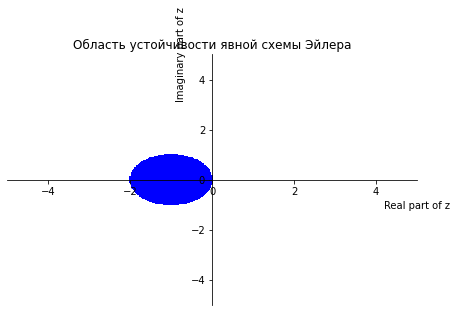

In [2]:
from sympy import symbols, Abs
from sympy import I
from sympy.plotting import plot_implicit

# Define the variable z
z = symbols('z', complex=True)
x, y = symbols('x y', real=True)
# Define the function R
R = 1 + z

# Define the absolute value of R
abs_R = Abs(R)

# Define the condition for the set |R(z)|<1
cond = abs_R < 1
display(cond)

z_number = x + I*y
cond = cond.subs(z, z_number)

display(cond)
# Plot the set where |R(z)|<1

plot_implicit(cond, adaptive = False,
              title='Область устойчивости явной схемы Эйлера',
              xlabel='Real part of z', ylabel='Imaginary part of z')

Т.е. явная схема Эйлера устойчива только для не слишком быстро затухающих процессов с "несильными" осцилляциями. 

__Пример 1.__ Область устойчивости неявного метода Эйлера.

Напишем неявный метод Эйлера:

$$
\frac{y_{n+1}-y_n}{\tau}=f(t_{n+1}, y_{n+1}), \quad y_0=a, \quad n=0,1, \ldots,
$$

В контексте уравнения Далквиста ($f=\lambda y$)

$$
\frac{y_{n+1}-y_n}{\tau}=\lambda y_{n+1}, \quad y_0=a, \quad n=0,1, \ldots,
$$

откуда следует

$$
y_{n+1}=\cfrac{y_n}{(1-\tau \lambda)}
$$

Т.е. функция устойчивости имеет вид

$$
R(z)=\cfrac{1}{1-z}
$$

Нарисуем область устойчивости:

1/Abs(z - 1) < 1

1/sqrt(x**2 - 2*x + y**2 + 1) < 1

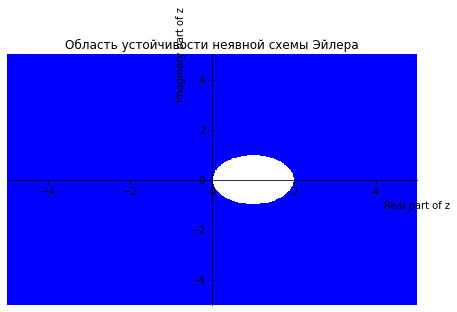

In [4]:
from sympy import symbols, Abs
from sympy import I
from sympy.plotting import plot_implicit

# Define the variable z
z = symbols('z', complex=True)
x, y = symbols('x y', real=True)
# Define the function R
R = 1/(1 - z)

# Define the absolute value of R
abs_R = Abs(R)

# Define the condition for the set |R(z)|<1
cond = abs_R < 1
display(cond)

z_number = x + I*y
cond = cond.subs(z, z_number)

display(cond.doit())
# Plot the set where |R(z)|<1

plot_implicit(cond, adaptive = False,
              title='Область устойчивости неявной схемы Эйлера',
              xlabel='Real part of z', ylabel='Imaginary part of z')

То есть неявная схема Эйлера устойчива для всего, кроме слабо растущих процессов с несильными осцилляциями.

## Классификация функций устойчивости

__Определение 2 (Далквист, 1963).__ Если область абсолютной устойчивости $S$ включает в себя левую полуплоскость комплексной плоскости $\operatorname{Re}(z) \leq 0$, то метод называется __А-устойчивым__.

Множество $\operatorname{Re}(z) \leq 0$ является существенно важным в вычислительных методах, потому что именно ему отвечают экспонциально затухающие процессы, с которыми мы как правило и работаем (т.к с экспонциально растущими процессами всё как правило и так плохо, то если ещё и с быстрозатухающими процессами всё плохо, то всё совсем плохо-плохо).

__Определение 3.__ Если область абсолютной устойчивости $S$ включает в себя угол с полураствором $\alpha$, отсчитываемым от отрицательного направления действительной оси в плоскости $z$, то метод называется __$\mathrm{A}(\alpha)$-устойчивым.__

Метод является __$\mathrm{A}(0)-$ устойчивым__, если условие верно только при $\alpha \rightarrow 0$.

__Определение 4.__ Численный метод называется __L-устойчивым__ (или асимптотически устойчивым), если он А-устойчив и выполнено условие $|R(z)| \rightarrow 0$ при $\operatorname{Re} z \rightarrow-\infty$.

Иногда в литературе можно встретить определение асимптотической устойчивости, не включающее в себя А-устойчивости. В этом случае численный метод должен быть, например, жестко устойчивым. Понятие жесткой устойчивости строго не определяется, но подразумевается, что для жесткой устойчивости метод будет абсолютно устойчивым на всем спектре рассматриваемой задачи. Кроме того. существует и альтернативная теория устойчивости численных методов для решения ЖС ОДУ.

__Определение 5.__ Численный метод называется __$Lp$-устойчивым__, если он А-устойчив и функция устойчивости затухает как $z^{-p}$ при $\operatorname{Re} z \rightarrow-\infty$.

Решения уравнения Далквиста, полученные L-устойчивыми методами, будут затухающими.

Еще одним важным свойством разностных схем является их монотонность. Говорить о монотонности численного метода для решения систем ОДУ можно только в том случае, когда решение дифференциальной задачи также монотонно, т.е. только для действительных отрицательных $z$ и, таким образом, для строго убывающих решений.

__Определение 6.__ Если функция устойчивости положительна на отрицательной части действительной оси (т.е. $R(z)>0$ при $\operatorname{Im} z=0, \operatorname{Re} z<0$ ), то метод называется __монотонным__.

__Теорема (барьер Далквиста).__ Не существует A-устойчивых многошаговых разностных схем порядка аппроксимации выше второго.

То есть, самым важным классом численных схем являются именно одношаговые методы, т.к. для них возможна (но вовсе необязательна) А-устойчивость.

Для повышения порядка аппроксимации с использованием многошаговых схем приходится мириться с отсутствием А-устойчивости и использовать вспомогательные понятия, как A($\alpha$)-устойчивость. Такие алгоритмы могут иметь порядок аппроксимации выше 2-го, но очень чувствительны к малым осцилляциям определённых частот.

## Одношаговые методы. Явные методы Рунге-Кутта. 

Рассмотрим хитрую запись с внутренними вычислениями. Сначала вычисляем $k_i$ по порядку, потом обновляем $y_{n+1}$.

$$
\begin{aligned}
&\left\{\begin{array}{l}
k_{1}=f\left(t_{n}, \, y_{n}\right) \\
k_{2}=f\left(t_{n}+\alpha_{2} \cdot \tau, \;\; y_{n}+\tau \cdot \beta_{21} \cdot k_{1}\right) \\
\vdots \\
k_{r}=f\left(t_{n}+\alpha_{r}\cdot \tau, \;\; y_{n}+\tau \cdot\left(\beta_{r 1} \cdot k_{1}+\ldots+\beta_{r, \, r-1} k_{r}\right)\right)
\end{array}\right. 
\end{aligned}  
$$

$$y_{n+1}=y_{n}+\tau \cdot\left(\gamma_{1}\cdot k_{1}+\ldots+\gamma_{r}\cdot k_{n}\right)$$

Для удобной записи коэффициентов используют таблицы Бутчера:

$$\\ \left[\begin{array}{l|llll}
0 & & & & \\
\alpha_{2} & \beta_{21} & & & \\
\alpha_{3} & \beta_{31} & \beta_{32} & & \\
\cdots &\cdots &\cdots &\cdots &\\
\alpha_{r} & \beta_{r 1} & \beta_{r, 2} & \cdots & \beta_{r, r-1} & \\
\hline& \gamma_{1} & \gamma_{2} & \cdots & \gamma_{r-1} & \gamma_{r}
\end{array}\right]$$

Метод, задаваемый такой таблицей, называется __r-стадийным__. Все методы Рунге-Кутта являются разновидностью одношаговых методов, перепеписанными в удобном виде. Общие свойства этой таблицы Бутчера опишем ниже, когда введём неявные методы.

Явными их делаем аналитическая возможность решить написанную выше систему - по сути мы по порядку вычисляем все поправки.

Приведём некоторые примеры (за точные коэффициенты здесь не ручаюсь):

__Модифицированный метод Эйлера:__

\begin{aligned}
&y_{n+1}=y_{n}+h f_{2}, \\
&f_{1}=f\left(x_{n}, y_{n}\right) \\
&f_{2}=f\left(x_{n}+\frac{h}{2} ; y_{n}+\frac{h f_{n}}{2}\right)
\end{aligned} 


\begin{array}{l|ll}
0 & 0 & 0 \\
1 / 2 & 1 / 2 & 0 \\
\hline & 0 & 1
\end{array} 


__Метод Эйлера с пересчётом:__

\begin{aligned}
&y_{n+1}=y_{n}+h \cdot \frac{f_{1}+f_{2}}{2} \\
&f_{1}=f\left(x_{1}, y_{n}\right) \\
&f_{2}=f\left(x_{n}+h, y_{n}+h f_{1}\right)
\end{aligned}  

\begin{array}{l|ll}
0 & 0 & 0 \\
1 & 1 & 0 \\
\hline & 1 / 2 & 1 / 2
\end{array}  

__Метод Хойна:__ 

\begin{aligned}
&y_{n+1}=y_{n}+h\left(f_{1}+3 f_{3}\right) \cdot \frac{1}{4} \\
&f_{1}=f\left(x_{n}, y_{n}\right) ; \\
&f_{2}=f\left(x_{n}+\frac{h}{3} ; y_{n}+\frac{h f_{1}}{3}\right) \\
&f_{3}=f\left(x_{n}+\frac{2 h}{3} ; y_{n}+2 h \frac{f_{2}}{3}\right)
\end{aligned}  

\begin{array}{l|ccc}
0 & 0 & 0 & 0 \\
1 / 3 & 1 / 3 & 0 & 0 \\
2 / 3 & 0 & 2 / 3 & 0 \\
\hline & 1 / 4 & 0 & 1 / 4
\end{array}  

__Классический метод Рунге-Кутта 4-го порядка:__

\begin{array}{c|cccc}
0 & 0 & 0 & 0 & 0 \\
1 / 2 & 1 / 2 & 0 & 0 & 0 \\
1 / 2 & 0 & 1 / 2 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 \\
\hline & 1 / 6 & 2 / 6 & 2 / 6 & 1 / 6
\end{array}  

__Метод Дормана-Принса 5(4)__

При компьютерных вычисления чаще всего используют __метод Дормана-Принса__. В 1980-м году Дорман и Принс построили вложенный метод 5(4)-го порядка, в котором решение 5-го порядка используется в качестве начального значения для следующего шага, а решение 4-го порядка – для определения локальной погрешности выполненного шага интегрирования (с целью последующего использования в механизме управления длинной шага).

$$
\begin{array}{c|cccccccc}
0 & & & & & & \\
\frac{1}{5} & \frac{1}{5} & & & & & \\
\frac{3}{10} & \frac{3}{40} & \frac{9}{40} & & & & & \\
\frac{4}{5} & \frac{44}{45} & -\frac{56}{15} & \frac{32}{9} & & & & \\
\frac{8}{9} & \frac{19372}{6561} & -\frac{25360}{2187} & \frac{64448}{6561} & -\frac{212}{729} & & & \\
1 & \frac{9017}{3168} & -\frac{355}{33} & \frac{46732}{5247} & \frac{49}{176} & -\frac{5103}{18656} & & \\
1 & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} & \\
\hline x_1 & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} & 0 \\
\hline \hat{x}_1 & \frac{5179}{57600} & 0 & \frac{7571}{16695} & \frac{393}{640} & -\frac{92097}{339200} & \frac{187}{2100} & \frac{1}{40}
\end{array}
$$


Первая строка коэффициентов b дает решение пятого порядка точности, а вторая строка дает альтернативное решение, которое при вычитании из первого решения дает оценку ошибки.
Поэтому его часто называют __методом "4-5-го порядка"__.

__Примечание.__ Несложно обобщить данный класс методов на неявный случай. Если таблица Бутчера на нижнетреугольная, то в общем случае на каждом шаге придётся решать нелинейную систему, чтобы найти все $k_i$.

## Жесткие системы

Какие системы можно считать "сложными? Для ответа на этот вопрос введём важное понятие __жесткости__ системы.

__Определение.__ Задачу Коши для системы ОДУ вида

$$
\frac{d \mathbf{u}}{d t}=\mathbf{f}(t, \mathbf{u}), \quad t>0, \quad \mathbf{u}(0)=\mathbf{u_0} , \quad \mathbf{u}: \mathbb{R} \rightarrow	\mathbb{R}^N , \quad \mathbf{f} : \mathbb{R^{N+1}} \rightarrow	\mathbb{R}^N
$$

назовем __жесткой__, если для спектра $\lambda_j \;\;(j=1, \ldots, N)$ матрицы Якоби

$$
\mathbf{J}=\frac{\partial \mathbf{f}(t, \mathbf{u})}{ \partial \mathbf{u}}
$$

можно ввести числа $\lambda_0, \; \Lambda_0 > 0: \; \; \lambda_0 \ll \Lambda_0$, относительно которых спектр разделяется на две части:

1) __жесткий спектр (быстрозатухающий)__ $(j=1, \ldots, N_1 )$, для которого выполняется :

$$\operatorname{Re} \lambda_j(t, \mathbf{u}) \leqslant-\Lambda_0$$

$$\left|\operatorname{Im} \lambda_j(t, \mathbf{u})\right|<\left|\operatorname{Re} \lambda_j(t, \mathbf{u})\right|$$

2) __мягкий спектр__ $(j=N_1+1, \ldots, N)$, для которого

$$
\left|\lambda_j(t, \mathbf{u})\right| \leqslant \lambda_0 \ll \Lambda_0
$$

Отношение $\mathrm{S} = \Lambda_0 / \lambda_0$ называется __показателем жесткости__ системы ОДУ. При этом обычно $\lambda_0 \approx 1$, а величина $\Lambda_0 \gg 1$ в приложениях часто бывает больше $10^6$. 

Такая проверка осуществляется в какой-либо точке, принадлежащей траектории системы. Конечно, существуют примеры, когда одна и та же система в разных точках своего фазового пространства может быть и жесткой, и нежесткой.

Иными словами, жесткость отвечает за разную скорость протекающих внутри системы процессов. Подробнее, компонента сответствующая жесткому спектру вынуждает выбирать мелкий шаг и, одновременно, быстро перестает влиять на решение из-за экспонциального затухания. Типичный пример графика решения жесткой системы:

ГРААААФИИИИИИИИИИИИИИИИИК






Можно ввести следующие классификацию систем по числу жесткости:

$$
\begin{array}{|l|l|}
\hline \text { Классификация } & \text { Число жесткости } \\
\hline \text { Умеренно жесткая } & \quad \quad  \mathrm{S}\approx10 \\
\hline \text { Средне жесткая } & \quad \quad  \mathrm{S}\approx10^2 \\
\hline \text { Сильно жесткая } & \quad 10^2 \lesssim \mathrm{S} \lesssim \mathrm10^5 \\
\hline \text { Экстремально жесткая } & \quad  10^6 \lesssim \mathrm{S} \lesssim \mathrm10^8 \\
\hline \text { Патологически жесткая } & \quad  \quad \mathrm{S} \gtrsim 10^9 \\
\hline
\end{array}
$$



Для жестких задач необходимо использование методов, позволяющих проводить расчет с шагами, определяемыми медленными, а не быстрыми процессами, при этом, естественно, численные методы должны быть устойчивыми.

__Примечание.__ Практически для всех жестких систем __явные методы не подходят__ в силу их неустойчивости при $\operatorname{Re} z \ll -1$. Нужно использовать более сложные методы.

При разработке разностных схем для численного решения жестких сложных систем обыкновенных дифференциальных уравнений необходимо учитывать следующие требования:
- схема должна быть аппроксимирующей;
- схема должна обладать устойчивостью, например: $A, A(\alpha)$, $A(0), \alpha$-устойчивостью;
- схему необходимо верифицировать на известных тестовых задачах.

## Одношаговые методы. Неявные методы Рунге-Кутта

Гораздо лучшую устойчивость имеют неявные методы Рунге-Кутта. Они вполне себе пригодны для решения жестких задач.

Пусть таблица для __r-стадийного__ неявного метода Рунге-Кутта имеет следующий __не__нижнетреугольный вид:

$$\\ \left[\begin{array}{l|llll}
\alpha_{1} & \beta_{11} & \beta_{12} & \cdots & \beta_{1, r-1} & \beta_{1r} \\
\alpha_{2} & \beta_{21} & \beta_{22} & \cdots & \beta_{2, r-1} & \beta_{2r} \\
\alpha_{3} & \beta_{31} & \beta_{32} & \cdots & \beta_{3, r-1} & \beta_{3r} \\
\cdots &\cdots &\cdots &\cdots & \cdots & \cdots \\
\alpha_{r} & \beta_{r, 1} & \beta_{r, 2} & \cdots & \beta_{r,\; r-1} & \beta_{r,\; r} \\
\hline & \gamma_{1} & \gamma_{2} & \cdots & \gamma_{r-1} & \gamma_{r}
\end{array}\right]$$

Тогда соответствующая ей система (вообще говоря нелинейная), которую необходимо решать на каждом шаге:

$$
\left\{\begin{array}{l}
k_1=f\left(t_n+\alpha_1 \cdot \tau, \quad y_n+\tau \cdot\left(\beta_{11} \cdot k_1+\beta_{12} \cdot k_2+\cdots+\beta_{1 r} \cdot k_r\right)\right) \\
k_2=f\left(t_n+\alpha_2 \cdot \tau, \quad y_n+\tau \cdot\left(\beta_{21} \cdot k_1+\beta_{22} \cdot k_2+\cdots+\beta_{2 r} \cdot k_r\right)\right) \\
k_3=f\left(t_n+\alpha_3 \cdot \tau, \quad y_n+\tau \cdot\left(\beta_{31} \cdot k_1+\beta_{32} \cdot k_2+\cdots+\beta_{3 r} \cdot k_r\right)\right) \\
\vdots \\
k_r=f\left(t_n+\alpha_r \cdot \tau, \quad y_n+\tau \cdot\left(\beta_{r 1} \cdot k_1+\beta_{r 2} \cdot k_2+\cdots+\beta_{r, r-1} \cdot k_{r-1}+\beta_{r, r} \cdot k_r\right)\right) \\
\end{array}\right.
$$

$$
y_{n+1}=y_n+\tau \cdot\left(\gamma_1 \cdot k_1+\gamma_2 \cdot k_2+\cdots+\gamma_r \cdot k_r\right)
$$

Как правило, эту систему решают __методом простой итерации__ (см. прошлый семестр).

Общее свойство всех таблиц Бутчера - __свойство Кутты__: 

$$
\sum_{j=1}^{r} \beta_{i j}=\alpha_i
$$

Для обеспечения нужного порядка аппроксимации $p$, также необходимы определенные условия на коэффициента таблицы Бутчера. Их несложно вывести, раскладывая $[y(x)]_{n+1}$ в ряд Тейлора и зануляя коэффициенты перед ненужными степенями $h$ методом неопределенных коэффициентов:

$$
\begin{aligned}
& p=1 \hookrightarrow \sum_{i=1}^s \gamma_i=1, \\
& p=2 \hookrightarrow \sum_{i=1}^s \gamma_i \alpha_i=1 / 2, \\
& p=3 \hookrightarrow \sum_{i=1}^s \gamma_i \alpha_i^2=1 / 3, \quad \sum_{i, j=1}^s b_i \beta_{i j} \alpha_j=1 / 6, \\
& p=4 \hookrightarrow \sum_{i=1}^s \gamma_i \alpha_i^3=1 / 4, \quad \sum_{i, j=1}^s b_i \alpha_i \beta_{i j} \alpha_j=1 / 8, \quad \sum_{i, j=1}^s \gamma_i \beta_{i j} \alpha_j^2=1 / 12, \quad  \sum_{i, j, k=1}^s \gamma_i \beta_{i j} \beta_{j k} \alpha_k=1 / 24 .
\end{aligned}
$$

Например, для порядка аппроксимации $p=4$ - нужно выполнения всех строчек выше. А для $p=3$, только первых трёх.

__Методы Гаусса__ соответственно 2-го, 4-го, и 6-го порядков аппроксимации. Второй метод называется методом (4-го порядка) называется __методом Хаммера - Холлинсворта__:

$$\left[
\begin{array}{l|l}
1 / 2 & 1 / 2 \\
\hline & 1
\end{array}\right]
$$

$$\left[
\begin{array}{c|cc}
 \frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} & \quad \frac{1}{4}-\frac{\sqrt{3}}{6} \\
 \frac{1}{2}+\frac{\sqrt{3}}{6} & \frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4} \\
 \hline &\frac{1}{2} & \frac{1}{2} \\
\end{array}\right]
$$

$$\left[
\begin{array}{c|cccc}
 \frac{1}{2}-\frac{\sqrt{15}}{10} & \frac{5}{36} &  \frac{2}{9}-\frac{\sqrt{15}}{15} &\frac{5}{36}-\frac{\sqrt{15}}{30} \\
 \frac{1}{2} &  \frac{5}{36}+\frac{\sqrt{15}}{24} &\frac{2}{9} & \frac{5}{36}-\frac{\sqrt{15}}{24} \\
 \frac{1}{2}+\frac{\sqrt{15}}{10} & \frac{5}{36}+\frac{\sqrt{15}}{30} &\frac{2}{9}+\frac{\sqrt{15}}{15} & \frac{5}{36} \\
\hline &\frac{5}{18} & \frac{4}{9} & \frac{5}{18}\\
\end{array}\right]
$$

__Методы Лобатто IIIА__ 2-го, 4-го и 6-го порядков точности:

$$\left[
\begin{array}{l|ll}
 0 & 0 & 0 \\
 1 & 1 / 2 & 1 / 2 \\
\hline & 1 / 2 & 1 / 2 \\
\end{array}\right]
$$

$$\left[
\begin{array}{l|lll}
 0 & 0 & 0 & 0 \\
 1 / 2 & 5 / 24 & 1 / 3 & -1 / 24 \\
1 & 1 / 6 & 2 / 3 & 1 / 6 \\
\hline & 1 / 6 & 2 / 3 & 1 / 6 \\
\end{array}\right]
$$

$$\left[
\begin{array}{l|llll}
 0 & 0 & 0 & 0 & 0 \\
 \frac{5-\sqrt{5}}{10} & \frac{11+\sqrt{5}}{120} & \frac{25-\sqrt{5}}{120} & \frac{25-13 \sqrt{5}}{120} & \frac{-1+\sqrt{5}}{120} \\
 \frac{5+\sqrt{5}}{10} & \frac{11-\sqrt{5}}{120} & \frac{25+13 \sqrt{5}}{120} & \frac{25+\sqrt{5}}{120} & \frac{-1-\sqrt{5}}{120} \\
 1 & 1 / 12 & 5 / 12 & 5 / 12 & 1 / 12 \\
\hline & 1 / 12 & 5 / 12 & 5 / 12 & 1 / 12 \\
\end{array}\right]
$$

### Пример на питоне реализации неявного метода Рунге-Кутта для жесткой системы и сравнение с явным методом

## Устойчивость методов Рунге-Кутта

**Теорема (о функции устойчивости методов Рунге-Кутта).** Пусть имеем r-стадийый метод Рунге-Кутта, заданный таблицей Бутчера $\begin{array}{c|c}
\vec{\alpha} & \mathbf{B} \\
\hline & \vec{\gamma}^\top
\end{array}$. 



Тогда его функция устойчивости имеет вид

$$
R(z)=1+z \cdot \vec{\gamma}^\top (\mathbf{E}-z \cdot \mathbf{B})^{-1}\vec{1} 
$$

или, что эквивалентно:

$$
R(z)=\cfrac{\operatorname{det}\left(\mathbf{E}-z \mathbf{B}+z \cdot \mathbf{\vec{1} \vec{\gamma}}^T\right)}{ \operatorname{det}\left(\mathbf{E}-z \mathbf{B}\right)}
$$

В случае, если система имеет порядок аппроксимации $p$, и этот самый порядок равняется числу стадий $p=r$, то эту формулу можно явно вычислить:

$$R_{r=p}(z)=1+z+\ldots+ \frac{z^r}{r !}$$

__Доказательство.__

To be written

## Пример исследования на устойчивость неявного метода Рунге-Кутта

Покажите, что неявный метод Рунге-Кутты (метод Хаммера-Холлингсуорта порядка 4), заданный таблицей Бутчера:

$$
\begin{array}{l|ll}
1 / 2-\sqrt{3} & 1 / 4 & 1 / 4-\sqrt{3} / 6 \\
1 / 2+\sqrt{3} & 1 / 4+\sqrt{3} / 6 & 1 / 4 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$

имеет четвертый порядок аппроксимации. Найдите функцию устойчивости $R(z)$ и исследуйте метод на $A$-устойчивость и $L$-устойчивость.

**Решение.**

Вспомним условия обеспечения порядков аппроксимации методов Рунге-Кутты:

$$
\begin{aligned}
& p=1 \hookrightarrow \sum_{i=1}^s \gamma_i=1, \\
& p=2 \hookrightarrow \sum_{i=1}^s \gamma_i \alpha_i=1 / 2, \\
& p=3 \hookrightarrow \sum_{i=1}^s \gamma_i \alpha_i^2=1 / 3, \quad \sum_{i, j=1}^s b_i \beta_{i j} \alpha_j=1 / 6, \\
& p=4 \hookrightarrow \sum_{i=1}^s \gamma_i \alpha_i^3=1 / 4, \quad \sum_{i, j=1}^s b_i \alpha_i \beta_{i j} \alpha_j=1 / 8, \quad \sum_{i, j=1}^s \gamma_i \beta_{i j} \alpha_j^2=1 / 12, \quad  \sum_{i, j, k=1}^s \gamma_i \beta_{i j} \beta_{j k} \alpha_k=1 / 24 .
\end{aligned}
$$

Для данного метода все эти соотношения проверяются непосредственной подстановкой (соотношения пятого порядка не выполняются). Т.е. порядок аппроксимации действительно 4. 

Для нахождения функции устойчивости воспользуемся общей формулой 

\begin{aligned}
& R(z)=1+z \cdot \vec{\gamma}^\top (\mathbf{E}-z \cdot \mathbf{B})^{-1}\vec{1} =1+\frac{z}{2}(1,1)\left(\begin{array}{cc}
1-\frac{z}{4} & -\frac{z}{4}+\frac{\sqrt{3} z}{6} \\
-\frac{z}{4}-\frac{\sqrt{3} z}{6} & 1-\frac{z}{4}
\end{array}\right)^{-1}\left(\begin{array}{l}
1 \\
1
\end{array}\right)= \\
& =1+\frac{z / 2}{\left(1-\frac{z}{4}\right)^2-\left(\frac{z^2}{16}-\frac{z^2}{12}\right)}(1,1)\left(\begin{array}{cc}
1-\frac{z}{4} & \frac{z}{4}-\frac{\sqrt{3} z}{6} \\
\frac{z}{4}+\frac{\sqrt{3} z}{6} & 1-\frac{z}{4}
\end{array}\right)\left(\begin{array}{l}
1 \\
1
\end{array}\right)=1+\frac{z}{\left(1-\frac{z}{2}+\frac{z^2}{12}\right)}= \\
& =\frac{\mathrm{z}^2+6 z+12}{\mathrm{z}^2-6 z+12}
\end{aligned} 


Эта функция является регулярной в левой полуплоскости $\mathbb{C}^{-}$и по принципу максимума модуля ее модуль принимает максимальное значение на границе (вертикальная ось $z=i y$ ).

Напомним определение регулярной функции и принцип максимума модуля.

Функция $f(z)$ комплексного переменного $z$, однозначно определенная в области $G$ и имеющая в каждой её точке конечную производную, называется **регулярной** в этой области.

**Tеорема о принципе максимума.** Модуль функиии, регулярной в некоторой области, не может достигать наибольшего значения внутри этой области, если только функиия отлична от тождественной постоянной.

На вертикальной оси $|R(z)|=\left|\frac{12-y^2+6 i y}{12-y^2-6 i y}\right| = 1 \quad  \forall y$. 

Таким образом, метод $A$-устойчив, но не $L$-устойчив, поскольку $\lim _{z \rightarrow-\infty} R(z) \neq 0$.

Построим также область абсолютной устойчивости:

Abs((z**2 + 6*z + 12)/(z**2 - 6*z + 12)) < 1

sqrt(x**4 + 12*x**3 + 2*x**2*y**2 + 60*x**2 + 12*x*y**2 + 144*x + y**4 + 12*y**2 + 144)/sqrt(x**4 - 12*x**3 + 2*x**2*y**2 + 60*x**2 - 12*x*y**2 - 144*x + y**4 + 12*y**2 + 144) < 1

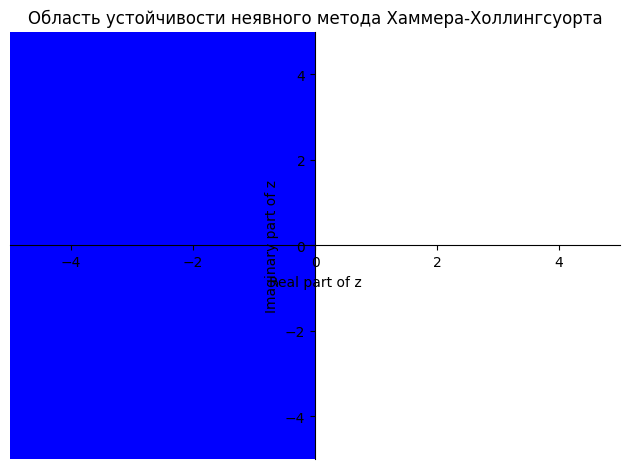

In [7]:
from sympy import symbols, Abs
from sympy import I
from sympy.plotting import plot_implicit

# Define the variable z
z = symbols('z', complex=True)
x, y = symbols('x y', real=True)
# Define the function R
R = (z**2 + 6*z + 12)/(z**2 - 6*z + 12)

# Define the absolute value of R
abs_R = Abs(R)

# Define the condition for the set |R(z)|<1
cond = abs_R < 1
display(cond)

z_number = x + I*y
cond = cond.subs(z, z_number).simplify()

display(cond.doit())
# Plot the set where |R(z)|<1

plot_implicit(cond, adaptive = False, depth=2, points = 1000,
              title='Область устойчивости неявного метода Хаммера-Холлингсуорта',
              xlabel='Real part of z', ylabel='Imaginary part of z')

## Многошаговые методы. Многошаговые методы Адамса

Так же как и неявные методы Рунге-Кутты, многошаговые методы хорошо решают жесткие задачи. Одно в силу барьера Далквиста, они никогда не будут иметь порядок аппроксимации больше 2.

В отличие от методов Рунге-Кутта, многошаговые методы основаны не на формуле Тейлора непосредственно, а на сеточной интерполяции.  

Многошаговые методы построены на том, что для вычисления значения $x_{k+1}$ применяются несколько предыдущих точек. При этом предыдущие несколько точек должны быть вычислены одношаговым методом (Эйлера, Рунге-Кутта). 

Интерполяционный метод Адамса использует предыдущие значения и неизвестное значение. 

 $y_{k+1}=y_{k}+h\left(f_{k+1}-\frac{\Delta f_{k}}{2}-\frac{\Delta^{2} f_{k-1}}{12}-\frac{\Delta^{3} f_{k-2}}{24}\right)$

Экстраполяционный метод Адамса использует только предыдущие: 


$y_{k+1}=y_{k}+h\left(f_{k}+\frac{\Delta f_{k-1}}{2}+\frac{5 \Delta^{2} f_{k_{2}}}{12}+\frac{3 \Delta^{3} f_{k-3}}{8}\right)$

Здесь 

$$
\begin{aligned}
&\Delta f_{k}=f_{k+1}-f_{k}\\
&\Delta^{2} f_{k}=f_{k+2}-2 f_{k+1}+f_{k} \\
&\Delta^{3} f_{k}=f_{k+3}-3 f_{k+2}+3 f_{k+1}-f_{k}
\end{aligned}
$$

и так далее. 

Эти и другие варианты формул метода Адамса можно вывести самостоятельно, используя интерполяционный многочлен Ньютона.

### Метод прогноза-коррекции Адамса

Многошаговые методы построены на том, что для вычисления значения $x_{k+1}$ применяются несколько предыдущих точек. При этом предыдущие несколько точек должны быть вычислены одношаговым методом (Эйлера, Рунге-Кутта).
Рассмотрим решение дифореренциального уравнения

$$
F\left(t, x, y, \ldots, y^{(n)}\right)=0 
$$

на интервале $\left[t_{i} ; t_{i+1}\right] .$ 

Будем считать, что решение в точках $t_{0}, t_{1}, t_{2}, \ldots, t_{i}$ уже найдено, и значения в этих точках будем использовать для нахождения значения $x\left(t_{i+1}\right)$.

Проинтегрируем уравнение на интервале $\left[t_{i} ; t_{i+1}\right]$ и получим соотношение:

$$
x\left(t_{i+1}\right)=x\left(t_{i}\right)+\int_{t_{i}}^{t_{i+1}} f(t, x(t)) d t
$$

При вычислении интеграла вместо функции $f(t, x(t))$ будем использовать интерполяционный полином Лагранжа, построенный по точкам $\left(t_{i-3}, x_{i-3}\right),\left(t_{i-2}, x_{i-2}\right),\left(t_{i-1}, x_{i-1}\right),\left(t_{i}, x_{i}\right) .$ 

Подставив полином Лагранжа в интеграл, получаем первое приближение (прогноз) $\tilde{t}_{ i + 1 }$ для значения функции в точке $t_{i+1}$

$$ \\
\tilde{x}_{i+1}=x_{i}+\frac{h}{24}\left(-9 f\left(t_{i-3}, x_{i-3}\right)+37 f\left(t_{i-2}, x_{i-2}\right)-59 f\left(t_{i-1}, x_{i-1}\right)+55 f\left(t_{i}, x_{i}\right)\right) .
$$   

Как только $\widetilde{x}_{i+1}$ вычислено, его можно использовать. 

Следующий полином Лагранжа для функции $f(t, x(t))$ построим по точкам $\left(t_{i-2}, x_{i-2}\right),\left(t_{i-1}, x_{i-1}\right),\left(t_{i}, x_{i}\right)$ и новой точке $\left(t_{i+1}, x_{i+1}\right)$, после чего подставляем его и получаем второе приближение (корректор):

$$
x_{i+1}=x_{i}+\frac{h}{24}\left(f\left(t_{i-2}, x_{i-2}\right)-5 f\left(t_{i-1}, x_{i-1}\right)+19 f\left(t_{i}, x_{i}\right)+9 f\left(t_{i+1}, \tilde{x}_{i+1}\right)\right)
$$

Таким образом, для вычисления значения $x\left(t_{i+1}\right)$ методом Адамса необходимо последовательно применять формулы прогноза и коррекции, а первые четыре точки можно получить методом Рунге-Кутта.

### Метод Милна

Отличие метода Милна от метода Адамса состоит в том, что в качестве интерполяционного полинома используется полином Ньютона.

Подставив вместо функции $f(t, x(t))$ интерполяционный полином Ньютона, построенный по точкам $\left(t_{k-3}, x_{k-3}\right),\left(t_{k-2}, x_{k-2}\right),\left(t_{k-1}, x_{k-1}\right),\left(t_{k}, x_{k}\right)$ получаем первое приближение - прогноз Милна $\widetilde{x}_{k+1}$ для значения функции в точке $t_{k+1}$ :

$$
x_{k+1}=x_{k-3}+\frac{4 h}{3}\left(2 f\left(t_{k-2}, x_{k-2}\right)-f\left(t_{k-1}, x_{k-1}\right)+2 f\left(t_{k}, x_{k}\right)+2 f\left(t_{k}, \tilde{x}_{k}\right)\right) .
$$

Следующий полином Ньютона для функции $f(t, x(t))$ построим по точкам $\left(t_{k-2}, x_{k-2}\right),\left(t_{k-1}, x_{k-1}\right),\left(t_{k}, x_{k}\right)$ и новой точке $\left(t_{k+1}, x_{k+1}\right)$, после чего подставляем его и получаем второе приближение - корректор Милна:

$$
x_{k+1}=x_{k-1}+\frac{h}{3}\left(f\left(t_{k-1}, x_{k-1}\right)+4 f\left(t_{k}, x_{k}\right)+f\left(t_{k+1}, \tilde{x}_{k+1}\right)\right) \cdot
$$

В методе Милна для вычисления значения $x\left(t_{k+1}\right)$ также необходимо последовательно применять формулы прогноза и коррекции, а первые четыре точки можно получить методом Рунге-Кутта.

Существует модифицированный метод Милна. В нем сначала вычисляется первое приближение по формуле прогноза Милна, затем вычисляется управляющий параметр:

$$
m_{k+1}=\tilde{x}_{k+1}+\frac{28}{29}\left(x_{k}-\tilde{x}_{k}\right)
$$

после чего вычисляется значение второго приближения - корректор Милна - по формуле:

$$
x_{k+1}=x_{k-1}+\frac{h}{3}\left(f\left(t_{k-1}, x_{k-1}\right)+4 f\left(t_{k}, x_{k}\right)+f\left(t_{k+1}, m_{k+1}\right)\right)
$$

## Анализ многошаговых методов на устойчивость

Пусть у нас есть произвольная многошаговая схема. Применим её для решения любимого модельного уравнения Далквиста $\mathbf{x}^{\prime}=\lambda \mathbf{x}$.

В таком раскладе, многошаговая схема приводится к следующей форме:

$$
\alpha_s \mathbf{x}_{n+s}+\ldots+\alpha_0 \mathbf{x}_n=\mathbf{0}
$$

При этом коэффициенты $\alpha_i$ - явные функции от $z=\lambda \cdot \tau$.

Представим решение как $\mathbf{x}_i=\mathbf{z} \zeta^i$ и подставим его в общий вид :

$$
\mathbf{z} \zeta^n\left(\alpha_s \zeta^s+\ldots+\alpha_0\right)=\mathbf{0}
$$

Отсюда $\zeta$ должно удовлетворять так называемому характеристическому уравнению

$$
\alpha_s \zeta^s+\ldots+\alpha_0=0
$$

Исследование характеристического уравнения усложняется, когда у него имеются кратные корни кратности $m$. 

Таким образом, если характеристический многочлен имеет корни $\zeta_1, \ldots, \zeta_l$ кратностей $m_1, \ldots, m_l$ соответственно, то общее решение уравнения:

$$
\mathbf{x}_n=\mathbf{p}_1(n) \zeta_1^n+\ldots+\mathbf{p}_l(n) \zeta_l^n
$$

где $\mathbf{p}_j(n)$ - многочлены степеней $\boldsymbol{m}_j-\mathbf{1}$, коэффициенты которых определяются из начальных условий. Поэтому для ограниченности решений $\mathbf{x}_i$ необходимо потребовать:

1) Корни кратности более единицы $\zeta$ лежат внутри единичной окружности $(|\zeta|<1)$,

2)  Все корни на единичной окружности $(|\zeta|=1)$ должны быть простыми.

__Определение.__ Многошаговые методы, удовлетворяющие этим требованиям, называются __устойчивыми по Далквисту__ или __D-устойчивыми__.

__Определение.__ __Областью (абсолютной) устойчивости__ назовём множество $S=\left \{z \in \mathbb{C}: \; \forall |\zeta_i(z)| \leq 1 \right \}$

### Пример исследования на устойчивость многошагового метода. (Не редактировано)

Покажите, что метод ФДН 2-го порядка $\frac{3 y_{l+1}-4 y_l+y_{l-1}}{2 h}=f\left(x_{l+1}, y_{l+1}\right)$  является $A$-устойчивым. 

**Решение.**

Действуя, как и в случае методов Рунге-Кутты, получаем следующее уравнение для $\Delta_l: \frac{3 \Delta_{l+1}-4 \Delta_l+\Delta_{l-1}}{2 h}=J \Delta_{l+1}$. Подставляя $z=J h$, получим следующее линейное разностное уравнение: $3 \Delta_{l+1}-4 \Delta_l+\Delta_{l-1}=2 z \Delta_{l+1}$. Его общее решение (при $3-2 z \neq 0$, что выполняется, так как нам интересна область $\operatorname{Re}(z) \leq 0$ ) равно $\Delta_l=C_1 q_1^l+C_2 q_2^l$, если корни характеристического уравения $(3-2 z) q^2-4 q+1=0$ различны и $\Delta_l=\left(C_1+C_2 l\right) q^l$, если корни кратные. Область устойчивости $S$ (где решение не возрастает при больших $l)$ - совокупность точек $z$, для которых все решения $\left|q_i(z)\right| \leq 1$ ( $\left|q_i(z)\right|<1$ для кратных корней, что выполняется, т.к. $q_1=q_2=1 / 2$ при $z=-1 / 2)$. Вместо исследования неоднозначного отображения из комплексной плоскости $z$ в комплексную плоскость $q$ рассмотрим обратное (однозначное) отображение, задаваемое формулой $z=\frac{3}{2}-\frac{2}{q}+\frac{1}{2 q^2}$. Внешность единичного круга в плоскости $q$ целиком отображается в правую полуплоскость $C^{+}$плоскости $z$. Действительно, при $q=\rho e^{i \varphi}, \rho \geq 1$, $\varphi \in[0,2 \pi]$ имеем
$$
\begin{aligned}
& \operatorname{Re}\left(z\left(\rho e^{i \varphi}\right)\right)=\operatorname{Re}\left(\frac{3}{2}-\frac{2}{\rho e^{i \varphi}}+\frac{1}{2 \rho^2 e^{2 i \varphi}}\right)=\frac{3}{2}-\frac{2}{\rho} \cos (\varphi)+ \\
& +\frac{1}{2 \rho}\left(2 \cos ^2(\varphi)-1\right)=\left(1-\frac{\cos (\varphi)}{\rho}\right)^2+\frac{1}{2}\left(1-\frac{1}{\rho^2}\right) \geq 0 .
\end{aligned}
$$
Значит, точки из левой полуплоскости плоскости $z$ при отображении в плоскость $q$ могут перейти только во внутренность единичного круга либо его границу, и схема $A$-устойчива.